# Data from the Web - ADA 2020 Tutorial

#### What do you find in this Notebook?

The purpose of the Notebook is to offer a **quick** overview on how to scrape a Web page. In details, we illustrate the two main libraries used for this purpose. Afterwords, we show how to retrieve data from the Web.

## Web scraping libraries

To fetch data from the Web with Python, you need to get use to two essential libraries:

 * [`Requests (HTTP)`](https://requests.kennethreitz.org/en/master/): get the `html` page to parse.

 * [`Beautiful Soup (HTML Parsing)`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/): parse the `html` and extract data.

In [28]:
# Import libraries
import requests
from bs4 import BeautifulSoup

If you have an error about missing modules, try this:
```
conda install requests
conda install beautifulsoup4
```

### Make a `get` request

The [GET method](https://en.wikipedia.org/wiki/Hypertext_Transfer_Protocol#Request_methods) retrieves information from the server.

We start scraping this website: https://httpbin.org/ - HTTP Request & Response Service. The website offers some useful endpoints [1] to check the content of our request. Some of them provide an 'echo service' that reply with the request received.

[1] Endpoint is a web address (URL) at which clients of a specific service can gain access to it. By referencing that URL, clients can get to operations provided by that service.

#### Example 1: Get request basics
Here we show an example on how use a get request. In particular, you see that we can get different information about the response:

* The status code [2] which tells us whether everything is fine and if the request worked
* The headers
* Body of the response (typically HTML for webpages or JSON/XML for web services)

[2] Find the reminder of HTTP status codes [here](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes). Some typical codes are: **200 OK** (standard response for successful HTTP requests) and **404 Not Found** (the requested resource could not be found but may be available in the future).

**NOTE:** this is an echo service, what you see is what we sent to the server

In [29]:
# Make the request
r = requests.get('https://httpbin.org/ip') # /ip: Returns the requester's IP Address.

print('Response status code: {0}\n'.format(r.status_code))
print('Response headers: {0}\n'.format(r.headers))
print('Response body: {0}'.format(r.text))

Response status code: 503

Response headers: {'Server': 'awselb/2.0', 'Date': 'Mon, 29 Sep 2025 14:02:46 GMT', 'Content-Type': 'text/html', 'Content-Length': '162', 'Connection': 'keep-alive'}

Response body: <html>
<head><title>503 Service Temporarily Unavailable</title></head>
<body>
<center><h1>503 Service Temporarily Unavailable</h1></center>
</body>
</html>



#### Example 2: Parsing JSON string from the response

If the body of the response is a JSON string, Requests offers a convenient way to parse the text and get a Python dictionary.

Let's try to get the current time from here: http://worldtimeapi.org/api/timezone/Europe/Zurich – a simple web service that returns the local-time for a given timezone as either JSON (by default) or plain-text.

In [30]:
r = requests.get('http://worldtimeapi.org/api/timezone/Europe/Zurich')

print('Response body (parsed json):')
r.json()

ConnectionError: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))

#### Example 3: Including parameters into get request

This time, the `url` has been slightly changed to include a parameter (key1).

Remember that the with the GET method the parameters are part of the URL.

In [ ]:
r = requests.get('https://httpbin.org/get?key1=value1')
r.json()

{'args': {'key1': 'value1'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate, br, zstd',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.32.5',
  'X-Amzn-Trace-Id': 'Root=1-68da90fb-0710a0753c7361db1d82e617'},
 'origin': '46.253.188.135',
 'url': 'https://httpbin.org/get?key1=value1'}

### Make a `post` request
The [POST method](https://en.wikipedia.org/wiki/POST_(HTTP)) requests that a web server accepts the data enclosed in the body of the request message, most likely for storing it.

A POST request can have the paramenters in the body. Let's how to do this with Requests library:

In [ ]:
payload = {'key1': 'value1', 'key2': 'value2'}
r = requests.post('https://httpbin.org/post', data=payload)
r.json()

{'args': {},
 'data': '',
 'files': {},
 'form': {'key1': 'value1', 'key2': 'value2'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate, br, zstd',
  'Content-Length': '23',
  'Content-Type': 'application/x-www-form-urlencoded',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.32.5',
  'X-Amzn-Trace-Id': 'Root=1-68da910c-24500562240c404a1f7ae8b7'},
 'json': None,
 'origin': '128.179.222.51',
 'url': 'https://httpbin.org/post'}

### Make a request and extract the Page Title!

* Send the request and get the `html`

In [ ]:
# Send the request
r = requests.get('https://httpbin.org/html')
r.text[:300]

'<!DOCTYPE html>\n<html>\n  <head>\n  </head>\n  <body>\n      <h1>Herman Melville - Moby-Dick</h1>\n\n      <div>\n        <p>\n          Availing himself of the mild, summer-cool weather that now reigned in these latitudes, and in preparation for the peculiarly active pursuits shortly to be anticipated, Per'

* Thus, we start to use our beloved `BeautifulSoup` to parse the HTML and we get the header

In [ ]:
# Extract the header
soup = BeautifulSoup(r.text, 'html.parser')
soup.h1

<h1>Herman Melville - Moby-Dick</h1>

## Let's get interesting data - DBLP

*DBLP is a computer science bibliography website. Starting in 1993 at the University of Trier, Germany, it grew from a small collection of HTML files and became an organization hosting a database and logic programming bibliography site. DBLP listed more than 3.66 million journal articles, conference papers, and other publications on computer science in July 2016, up from about 14,000 in 1995.*

<div align="right">https://en.wikipedia.org/wiki/DBLP</div> 

We want to check the distribution of the publications by year of the president of EPFL - Martin Vetterli.

First of all, let's check the page with the data we need:

In [ ]:
URL = 'http://dblp.uni-trier.de/pers/hd/v/Vetterli:Martin'

The page is public and accessible with a browser using a simple GET:

In [ ]:
r = requests.get(URL)
page_body = r.text

Now the page content is downloaded and we can inspect the body of the response:

In [ ]:
page_body[:300]

'<!DOCTYPE html>\n<html lang="en">\n<head><meta charset="UTF-8"><title>dblp: Martin Vetterli</title><link rel="home" href="https://dblp.org"><link rel="search" type="application/opensearchdescription+xml" href="https://dblp.org/xml/osd.xml" title="dblp search"><link rel="apple-touch-icon" type="image/p'

It is pure HTML, and we need BeautifulSoup to parse the content. We can specify the parser we want to use html.parser, lxml, lxml-xml, xml, html5lib. Each of them has advantages and disadvantages - see [documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#installing-a-parser).

In [ ]:
soup = BeautifulSoup(page_body, 'html.parser')

Now the page is parsed and we can read the data we need!

For example, let's get the title! Are we in the right page?

In [ ]:
soup.title

<title>dblp: Martin Vetterli</title>

Yes! And we can get the clean text without HTML tags:

In [ ]:
soup.title.string

'dblp: Martin Vetterli'

A more complex query now! Let's find all the links in the page. 

In HTML a link is defined using the tag &lt;A&gt;, and BeautifulSoup offers an easy way to find them:

In [ ]:
all_links = soup.find_all('a')
print('The webpage cointains {0} links...'.format(len(all_links)))

The webpage cointains 15569 links...


In [ ]:
external_links = 0
for link in all_links:
    if(link.get('href') and not link.get('href').startswith('http://dblp.uni-trier.de/')
       and link.get('href').startswith('http')):  # just an example, you may need more checks
        external_links += 1

print('... and {0} of them point to external websites.'.format(external_links))

... and 14585 of them point to external websites.


Let's move on. Now we want to extract the sections that contain the publication details.

**The easiest way is to inspect the DOM of the web page with a browser.** Check with your browser how to isolate the portions of the page that represent publications. --- Task not in this Notebook ---

Ok, each row is composed by a &lt;li&gt; tag and has a class called 'entry':

In [ ]:
publications_wrappers = soup.find_all('li', class_='entry')

Let's check the number of rows:

In [ ]:
print('Total number of items: {0}'.format(len(publications_wrappers)))

Total number of items: 470


In [ ]:
for p in publications_wrappers:
    print(p.find('span', class_='title').text)

Towards Robust and Generalizable Lensless Imaging With Modular Learned Reconstruction.
Let There Be Light: Robust Lensless Imaging Under External Illumination With Deep Learning.
Towards Robust and Generalizable Lensless Imaging with Modular Learned Reconstruction.
Interactive Digital Engagement With Visual Artworks and Cultural Artefacts Enhances User Aesthetic Experiences in the Laboratory and Museum.
A Modular and Robust Physics-Based Approach for Lensless Image Reconstruction.
Let There Be Light: Robust Lensless Imaging Under External Illumination With Deep Learning.
LenslessPiCam: A Hardware and Software Platform for Lensless Computational Imaging with a Raspberry Pi.
Blind as a Bat: Audible Echolocation on Small Robots.
LenslessPiCam: A Hardware and Software Platform for Lensless Computational Imaging with a Raspberry Pi.
Blind as a bat: audible echolocation on small robots.
pyFFS: A Python Library for Fast Fourier Series Computation and Interpolation with GPU Acceleration.
Three

In [ ]:
import pandas as pd
%matplotlib inline

In [ ]:
publications_list = []
for p in publications_wrappers:
    title = p.find('span', class_='title').text  # get the title
    authos_list = p.find_all('span', {'itemprop': 'author'})  # get the authors list
    authors = [author.text for author in authos_list]
    year = p.find('span', {'itemprop': 'datePublished'}).text
    publications_list.append({'title': title,
                         'authors': authors,
                         'year': int(year)})  # here you should validate the data

publications = pd.DataFrame.from_dict(publications_list)
publications.head()

,title,authors,year
0,Towards Robust and Generalizable Lensless Imag...,"[Eric Bezzam, Yohann Perron, Martin Vetterli]",2025
1,Let There Be Light: Robust Lensless Imaging Un...,"[Eric Bezzam, Stefan Peters, Martin Vetterli]",2025
2,Towards Robust and Generalizable Lensless Imag...,"[Eric Bezzam, Yohann Perron, Martin Vetterli]",2025
3,Interactive Digital Engagement With Visual Art...,"[Domicele Jonauskaite, Nele Dael, Loïc Baboula...",2024
4,A Modular and Robust Physics-Based Approach fo...,"[Yohann Perron, Eric Bezzam, Martin Vetterli]",2024


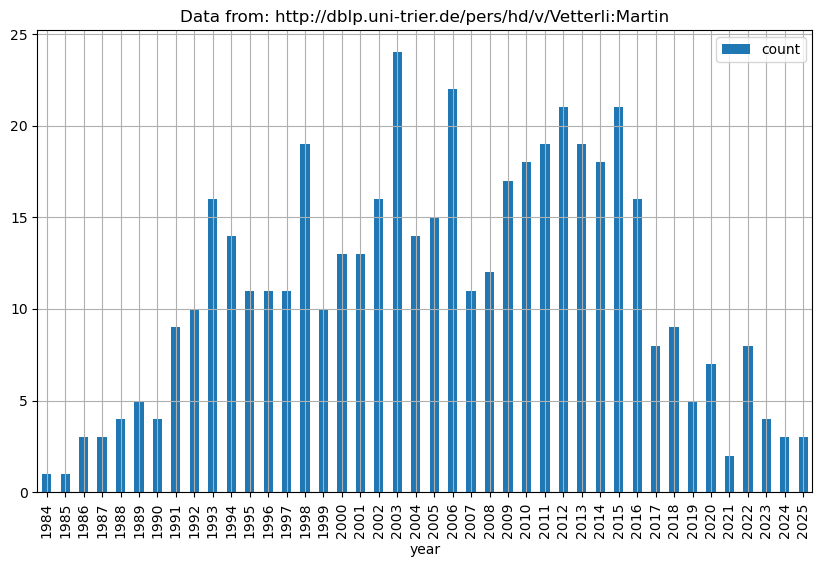

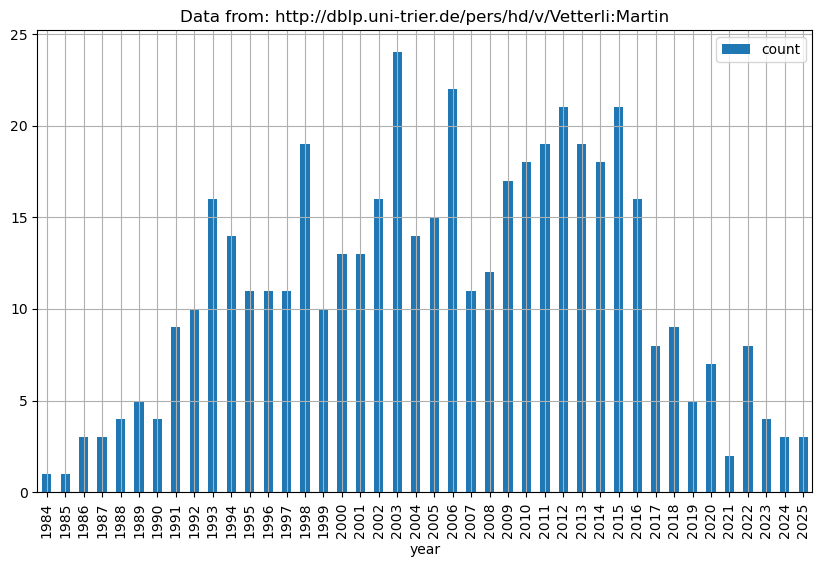

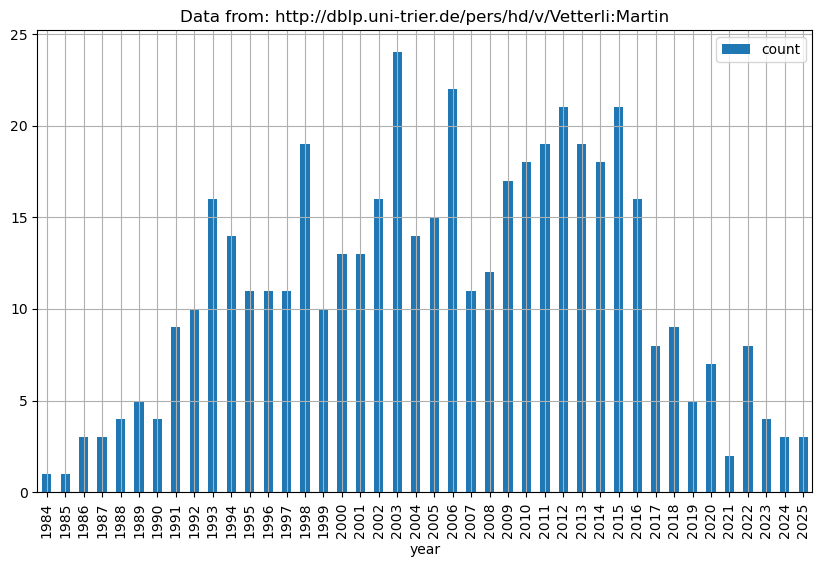

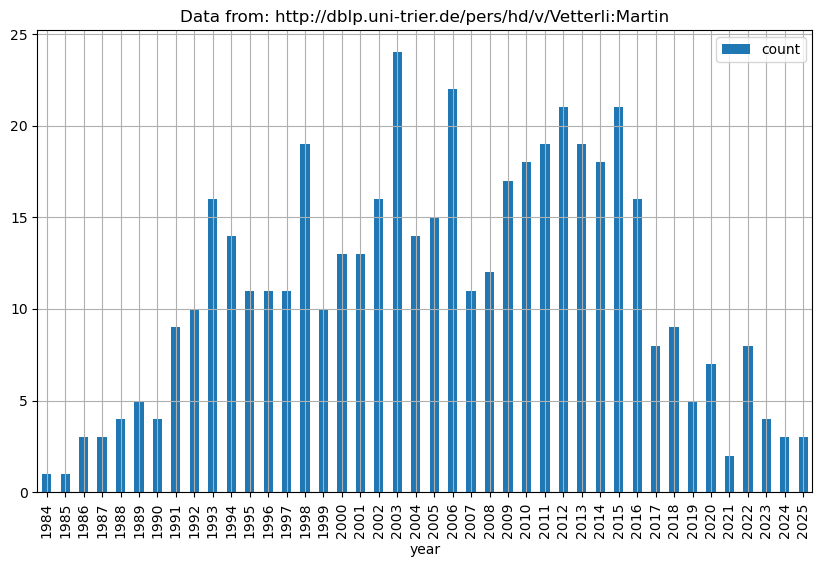

In [32]:
publications.groupby('year')\
    .count()\
    .rename(columns = {'title':'count'})\
    .plot(y='count', kind='bar', grid=True, figsize=(10, 6), title='Data from: ' + URL)

import matplotlib.pyplot as plt
plt.show()